In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


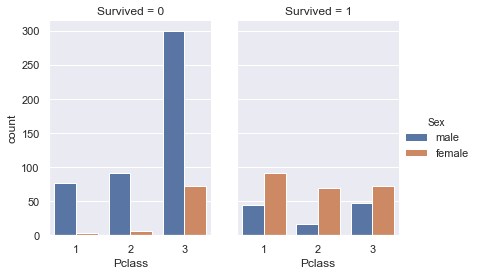

In [5]:
sns.set(style="darkgrid")
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train_data, kind="count", height=4, aspect=.7)
plt.show()

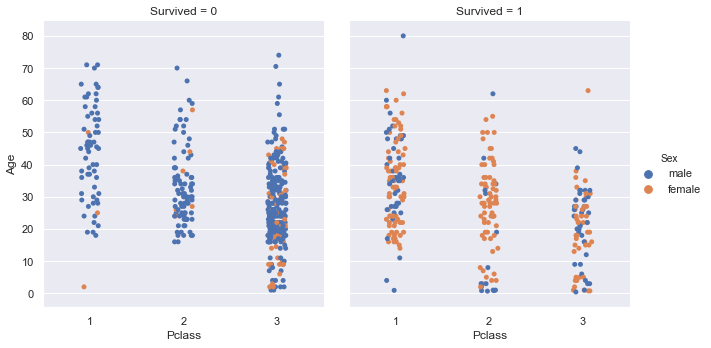

In [6]:
sns.catplot(x="Pclass", y="Age", hue="Sex", col="Survived", data=train_data, height=5, aspect=.9)
#plt.show()

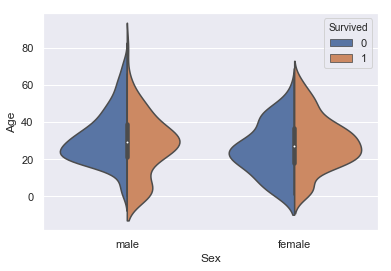

In [7]:
sns.violinplot(x="Sex",y="Age", hue="Survived", split="True", data=train_data);
#plt.show()

In [8]:
#sns.countplot(x="Cabin", hue="Survived", data=train_data)
#plt.show()

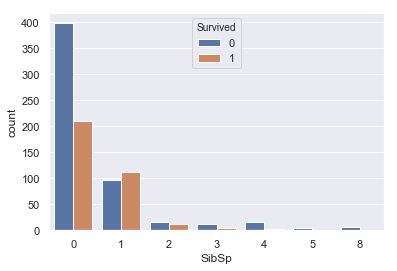

In [9]:
sns.countplot(x="SibSp", hue="Survived", data=train_data)
#plt.show()

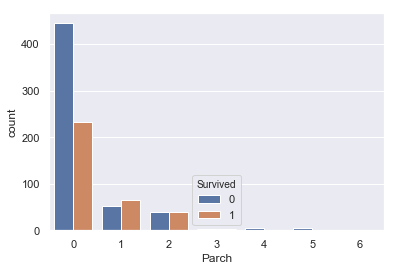

In [10]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
#plt.show()

In [11]:
#sns.countplot(x="Ticket", hue="Survived", data=train_data)
#plt.show()

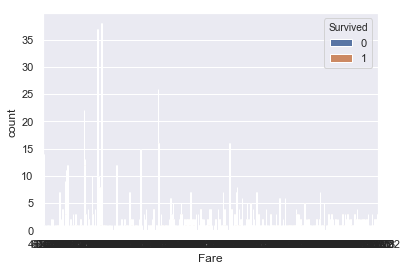

In [42]:
sns.countplot(x="Fare", hue="Survived", data=train_data)
#plt.show()

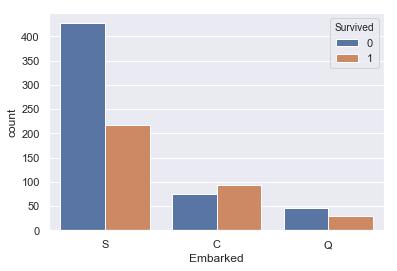

In [13]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
#plt.show()

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
### Data preparation ###
train_y = train_data["Survived"]
train_X = train_data.copy()
test_X = test_data.copy()

features_to_drop = ['PassengerId','Name', "Ticket", "Fare", "Cabin"]
train_X.drop(features_to_drop + ["Survived"],axis=1, inplace=True)
test_X.drop(features_to_drop,axis=1, inplace=True)

train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [16]:
test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [17]:
train_X.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [18]:
train_X['Age'].fillna(random.randint(20,30), inplace = True)
test_X['Age'].fillna(random.randint(20,30), inplace = True)

train_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [19]:
test_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [20]:
train_X.Embarked.mode()

0    S
dtype: object

In [21]:
train_X['Embarked'].fillna('S', inplace = True)
test_X['Embarked'].fillna('S', inplace = True)
train_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [22]:
test_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
print('Pclass:', train_X.Pclass.unique())
print('Sex:', train_X.Sex.unique())
print('SibSp:', train_X.SibSp.unique())
print('Parch:', train_X.Parch.unique())
print('Embarked:', train_X.Embarked.unique())

('Pclass:', array([3, 1, 2], dtype=int64))
('Sex:', array(['male', 'female'], dtype=object))
('SibSp:', array([1, 0, 3, 4, 2, 5, 8], dtype=int64))
('Parch:', array([0, 1, 2, 5, 3, 4, 6], dtype=int64))
('Embarked:', array(['S', 'C', 'Q'], dtype=object))


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_X['Sex'] = le.fit_transform(train_X['Sex'])
train_X['Embarked'] = le.fit_transform(train_X['Embarked'])

test_X['Sex'] = le.fit_transform(test_X['Sex'])
test_X['Embarked'] = le.fit_transform(test_X['Embarked'])

train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


In [25]:
test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [26]:
### Feature scaling ###
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()

train_X = pd.DataFrame(standardScalerX.fit_transform(train_X),columns = train_X.columns)
test_X = pd.DataFrame(standardScalerX.fit_transform(test_X),columns = test_X.columns)

train_X.head()

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python27\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,0.585954
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,-1.942303
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,0.585954
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.585954
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,0.585954


In [27]:
test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.873482,0.755929,0.415076,-0.499470,-0.400248,-0.470915
1,0.873482,-1.322876,1.391780,0.616992,-0.400248,0.700767
2,-0.315819,0.755929,2.563825,-0.499470,-0.400248,-0.470915
3,0.873482,0.755929,-0.170947,-0.499470,-0.400248,0.700767
4,0.873482,-1.322876,-0.561628,0.616992,0.619896,0.700767


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=4.0, random_state=0, max_iter=100)
model.fit(train_X, train_y)
model.coef_

array([[-0.95377747, -1.30597246, -0.50661378, -0.34386073, -0.05981826,
        -0.18559549]])

('Accuracy mean:', 0.7957885030076042, '+/-', 0.0180983953794458, '\n')
('Cross-validated scores:', array([0.78888889, 0.78888889, 0.76404494, 0.80898876, 0.79775281,
       0.78651685, 0.78651685, 0.78651685, 0.82022472, 0.82954545]))


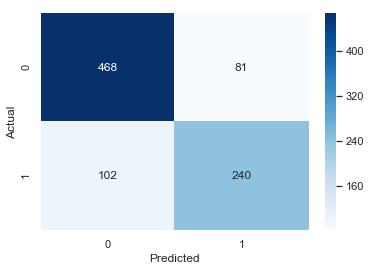

In [41]:
### Cross-validation ###
from sklearn.model_selection import cross_val_score, cross_val_predict

cv_predictions = cross_val_predict(model, train_X, train_y, cv=6)
confusion_matrix = pd.crosstab(train_y, cv_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

accuracies = cross_val_score(estimator = model, X=train_X , y=train_y , cv = 10)
print("Accuracy mean:", accuracies.mean(), "+/-", accuracies.std(),"\n")
print("Cross-validated scores:", accuracies)

In [38]:
predictions = model.predict(test_X)
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predictions})
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
